# Bagging : Decision Trees & Random Forests
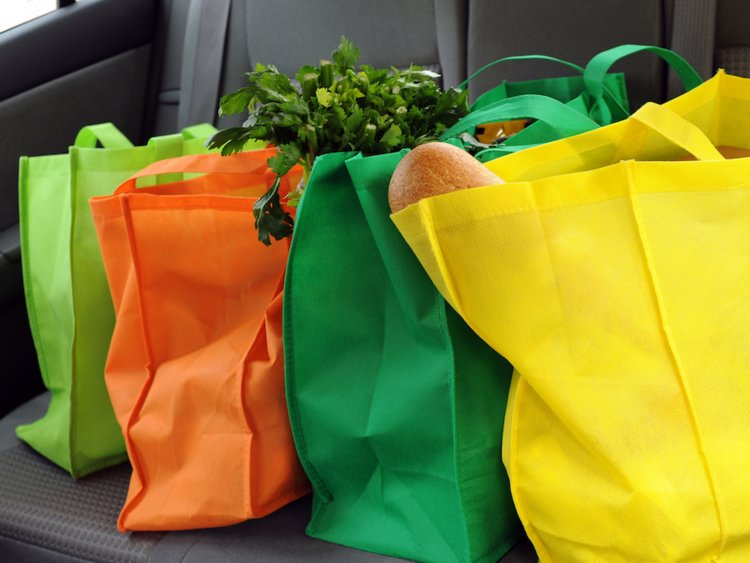

# Setup

In [255]:
import math
import random
from pprint import pprint
import pandas as pd
import numpy as np
from subprocess import call
from IPython.display import Image

import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling 

from sklearn.datasets import load_boston
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import ExtraTreesClassifier
from rgf import RGFRegressor
from rgf import RGFClassifier

from sklearn.pipeline import make_pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.pipeline import Pipeline

from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_transformer

from sklearn.base import BaseEstimator
from sklearn.base import TransformerMixin

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split

from yellowbrick.regressor import ResidualsPlot
from yellowbrick.regressor import PredictionError

from treeinterpreter import treeinterpreter as ti

from sklearn.tree import export_graphviz

In [253]:
#!conda install -c districtdatalabs yellowbrick --yes
#!pip install rgf_python -v
#!pip install treeinterpreter

# Regression

## Boston House Prices

In [3]:
boston = load_boston()
print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [4]:
bostonDF = pd.DataFrame(boston['data'], columns=boston['feature_names'])
bostonDF['TARGET'] = boston['target']
bostonDF.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  TARGET  
0     15.3  396.90   4.98    24.0  
1     17.8  396.90   9.14    21.6  
2     17.8  392.83   4.03    34.7  
3     18.7  394.63   2.94    33.4  
4     18.7  396.90   5.33    36.2

## Test & Train Split

In [5]:
X = bostonDF.drop('TARGET', axis=1)
y = bostonDF['TARGET']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Pipeline

In [6]:
featuresNumeric = [
    'CRIM',
    'ZN',
    'INDUS',
    'CHAS',
    'NOX',
    'RM',
    'AGE',
    'DIS',
    'RAD',
    'TAX',
    'PTRATIO',
    'B',
    'LSTAT'
]
transformerNumeric = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median'))
])

featuresCategorical = []
transformerCategorical = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot',  OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(transformers=[
        ('numeric',     transformerNumeric,     featuresNumeric),
        ('categorical', transformerCategorical, featuresCategorical)
])

## Metrics

In [7]:
def metrics(truth, predictions):
    mae  = mean_absolute_error(truth, predictions)
    mse  = mean_squared_error(truth,  predictions)
    rmse = math.sqrt(mse)

    # Print out error for predictions
    print('MAE      : {:.3f}'.format(mae))
    print('MSE      : {:.3f}'.format(mse))
    print('RMSE     : {:.3f}'.format(rmse))

    # Compute Accuracy
    errors = abs(truth - predictions)
    mape = 100 * (errors / truth)
    accuracy = 100 - np.mean(mape)
    print('Accuracy : {:.2f}%'.format(accuracy))
    
    return (mae, mse, rmse, accuracy)

In [8]:
resultsDF = pd.DataFrame(columns=['MAE', 'MSE', 'RMSE', 'Accuracy'])

# Decision Tree
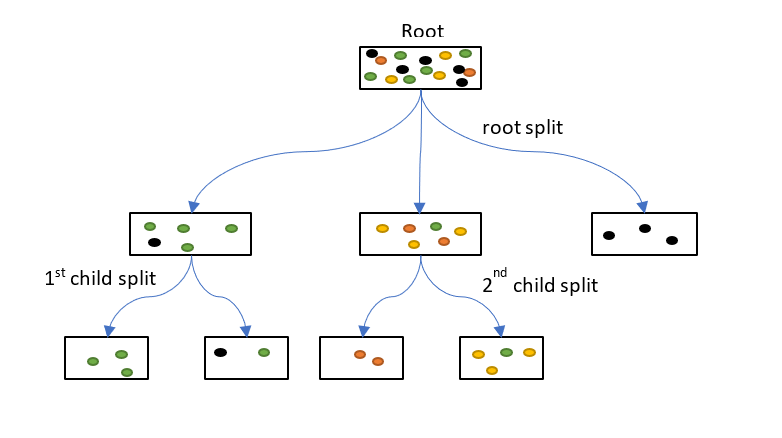

## Entropy
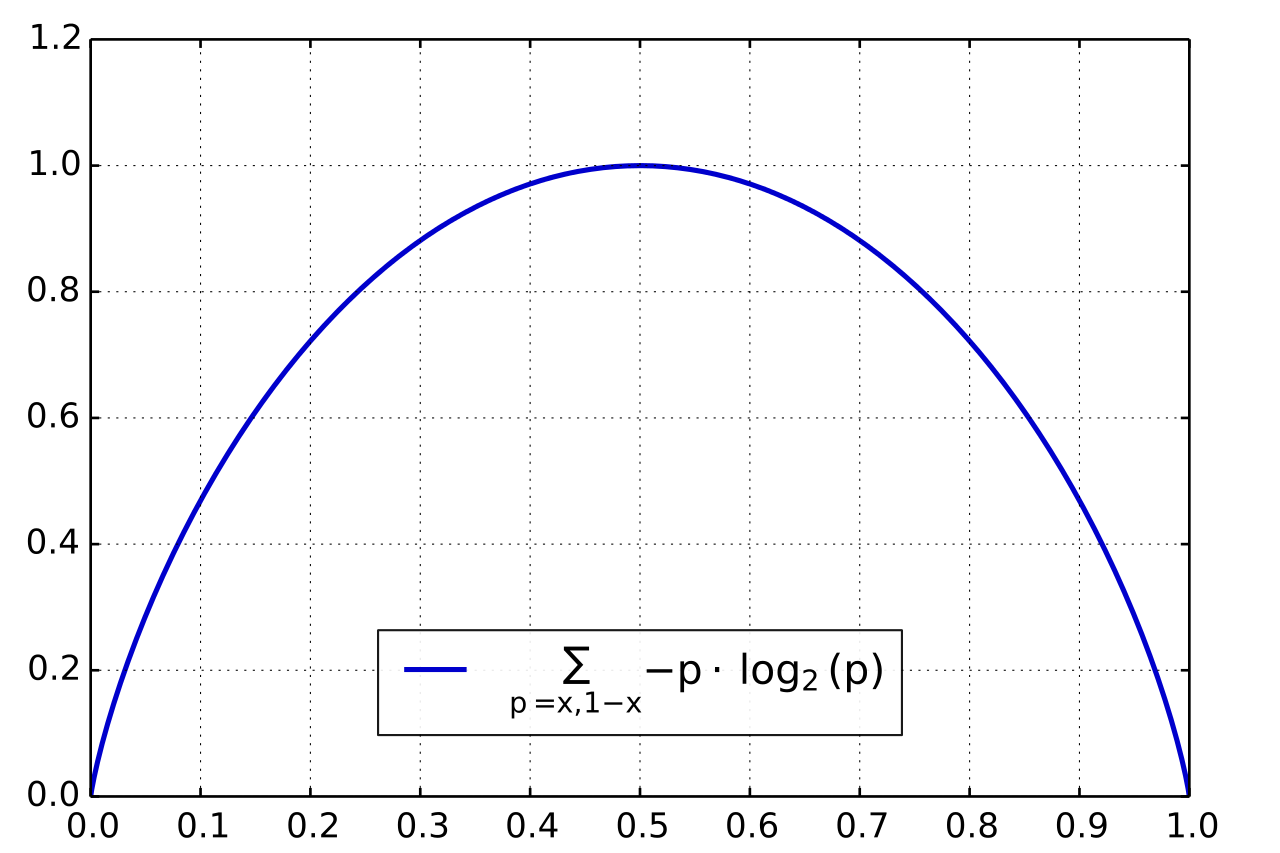

## Information Gain
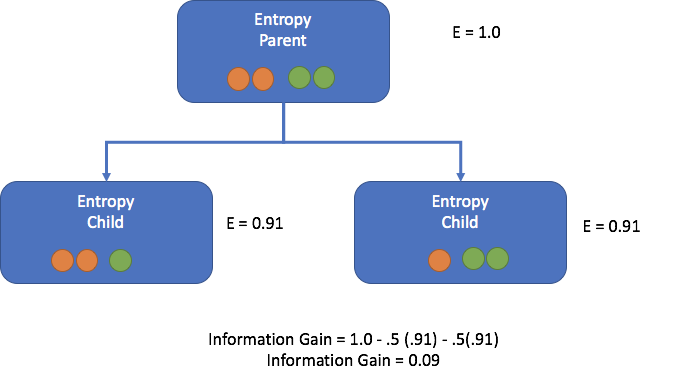

## Algorithm
* Maximize Information Gain

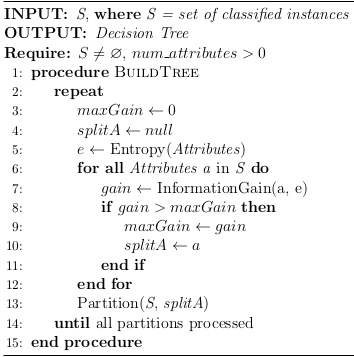

## Model

In [235]:
dt = DecisionTreeRegressor(random_state=301)
dtPipe = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('classifier', dt)
])
dtPipe.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('preprocess',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('numeric',
                                                  Pipeline(memory=None,
                                                           steps=[('imputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value=None,
                                                                                 missing_values=nan,
                                                                                 strategy='median',
                                                           

## Predictions

In [236]:
preds = dtPipe.predict(X_test)
print('Score Train {:.3f}'.format(dtPipe.score(X_train, y_train)))
print('Score Test  {:.3f}'.format(dtPipe.score(X_test, y_test)))

Score Train 1.000
Score Test  0.736


## Metrics

In [237]:
maeDT, mseDT, rmseDT, accuracyDT = metrics(y_test, preds)
resultsDF.loc['Decision Tree'] = [maeDT, mseDT, rmseDT, accuracyDT]

MAE      : 3.161
MSE      : 20.170
RMSE     : 4.491
Accuracy : 80.85%


## Residuals Plot

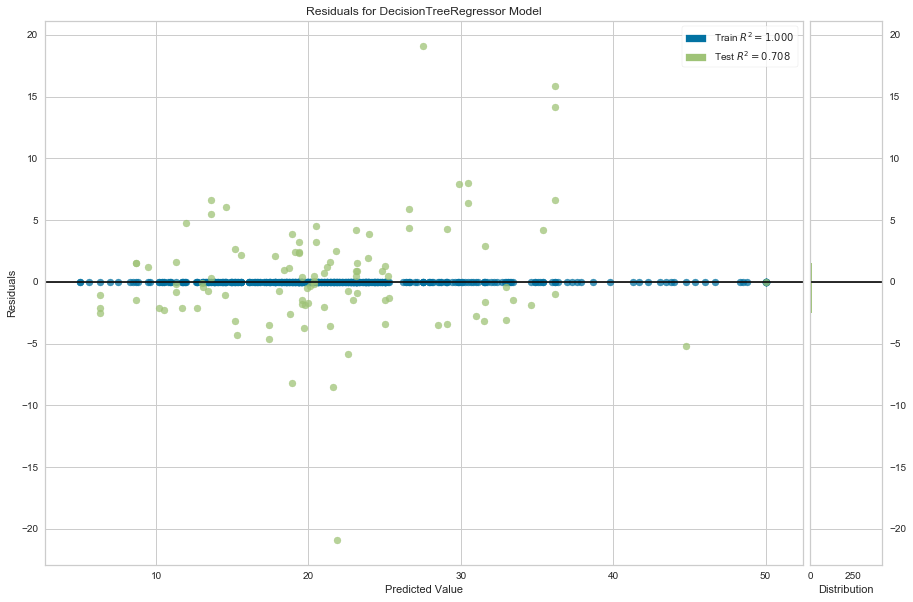

In [11]:
plt.figure(figsize=(15,10))
visualizer = ResidualsPlot(dtPipe)
visualizer.fit(X_train, y_train)  # Fit the training data to the model
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.poof() 

## View Decision Tree

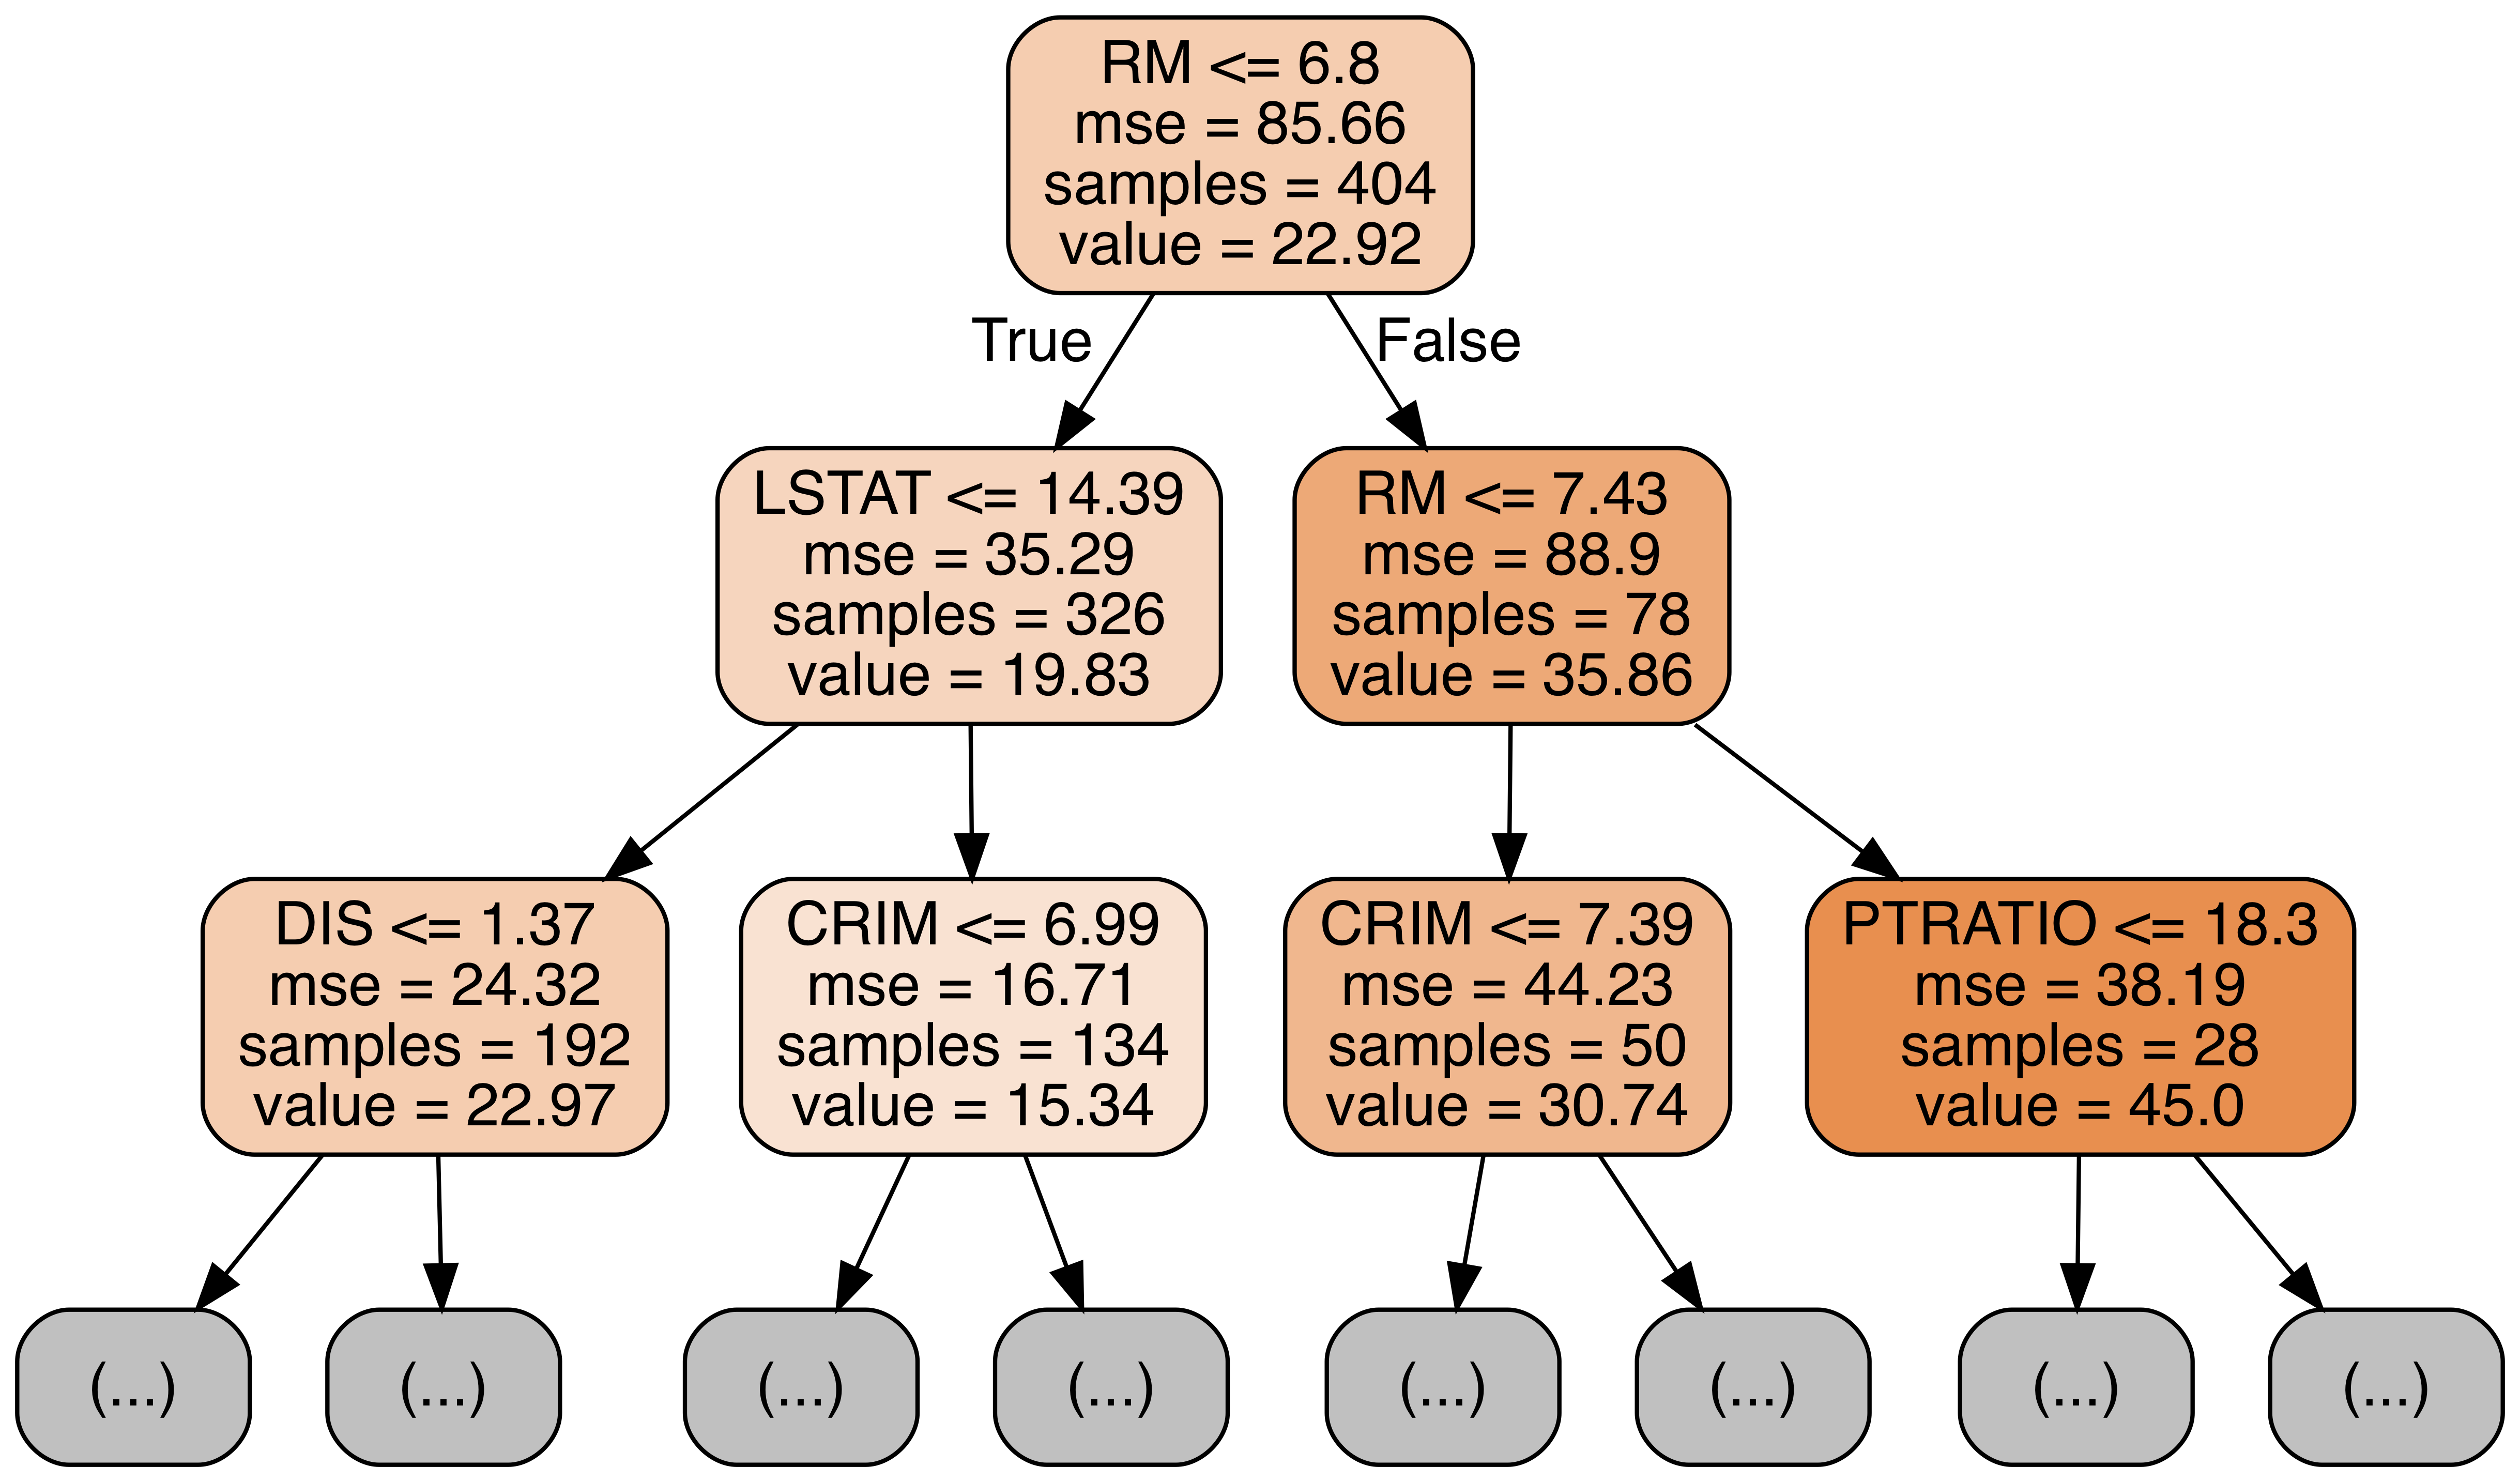

In [13]:
export_graphviz(dt, out_file='dtree.dot', 
                feature_names = X_train.columns,
                rounded = True, proportion = False, 
                precision = 2, filled = True, max_depth=2)
call(['dot', '-Tpng', 'dtree.dot', '-o', 'dtree.png', '-Gdpi=600'])
Image(filename = './dtree.png')

## View Decision Path

In [153]:
X_sample  = pd.DataFrame(X_test.copy().reset_index(drop=True).loc[0]).T
predicted = dtPipe.predict(X_sample)
sample_id = 0

n_nodes        = dt.tree_.node_count
children_left  = dt.tree_.children_left
children_right = dt.tree_.children_right
feature        = dt.tree_.feature
threshold      = dt.tree_.threshold

node_indicator = dt.decision_path([X_sample.iloc[0]])
leave_id       = dt.apply([X_sample.iloc[0]])
node_index = node_indicator.indices[node_indicator.indptr[sample_id]:
                                    node_indicator.indptr[sample_id + 1]]
print('Values for Sample\n', X_sample.T, '\n')
print('Rules used to predict')
for node_id in node_index:
    if leave_id[sample_id] == node_id:
        continue

    if X_sample.iloc[sample_id, feature[node_id]] <= threshold[node_id]:
        threshold_sign = "<="
    else:
        threshold_sign = ">"

    print("Node[%3s] %10s = %10s %3s %10s"
          % (node_id,
             X_test.columns[feature[node_id]],
             X_test.iloc[sample_id, feature[node_id]],
             threshold_sign,
             threshold[node_id]))
print('Predicted : %s' % predicted)

Values for Sample
                  0
CRIM       0.13117
ZN         0.00000
INDUS      8.56000
CHAS       0.00000
NOX        0.52000
RM         6.12700
AGE       85.20000
DIS        2.12240
RAD        5.00000
TAX      384.00000
PTRATIO   20.90000
B        387.69000
LSTAT     14.09000 

Rules used to predict
Node[  0]         RM =      6.127  <= 6.797000169754028
Node[  1]      LSTAT =      14.09  <= 14.394999980926514
Node[  2]        DIS =     2.1224   > 1.3727499842643738
Node[  6]      LSTAT =      14.09   > 7.450000047683716
Node[114]        TAX =      384.0   >      208.0
Node[118]         RM =      6.127   > 6.077500104904175
Node[238]      LSTAT =      14.09   > 9.919999599456787
Node[296]          B =     387.69   > 197.5199966430664
Node[300]    PTRATIO =       20.9   > 20.550000190734863
Node[352]        DIS =     2.1224  <= 4.3468499183654785
Node[353]          B =     387.69   > 386.4600067138672
Node[355]       CRIM =    0.13117  <= 0.17560499906539917
Node[356]        DIS

## Overfitting

In [238]:
print('Number of leaves in decision tree %s' % dt.get_n_leaves())
print('Depth of decision tree %s' % dt.get_depth())

Number of leaves in decision tree 379
Depth of decision tree 23


In [249]:
dtReg = DecisionTreeRegressor(max_depth=10, max_leaf_nodes=200, random_state=101)
dtRegPipe = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('classifier', dtReg)
])
dtRegPipe.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('preprocess',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('numeric',
                                                  Pipeline(memory=None,
                                                           steps=[('imputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value=None,
                                                                                 missing_values=nan,
                                                                                 strategy='median',
                                                           

In [250]:
preds = dtRegPipe.predict(X_test)
print('Score Train {:.3f}'.format(dtRegPipe.score(X_train, y_train)))
print('Score Test  {:.3f}'.format(dtRegPipe.score(X_test, y_test)))

Score Train 0.990
Score Test  0.789


In [251]:
maeDT, mseDT, rmseDT, accuracyDT = metrics(y_test, preds)
resultsDF.loc['Regularized Decision Tree'] = [maeDT, mseDT, rmseDT, accuracyDT]

MAE      : 2.888
MSE      : 16.170
RMSE     : 4.021
Accuracy : 84.02%


# Random Forest
* https://www.stat.berkeley.edu/~breiman/randomforest2001.pdf
* https://towardsdatascience.com/an-implementation-and-explanation-of-the-random-forest-in-python-77bf308a9b76
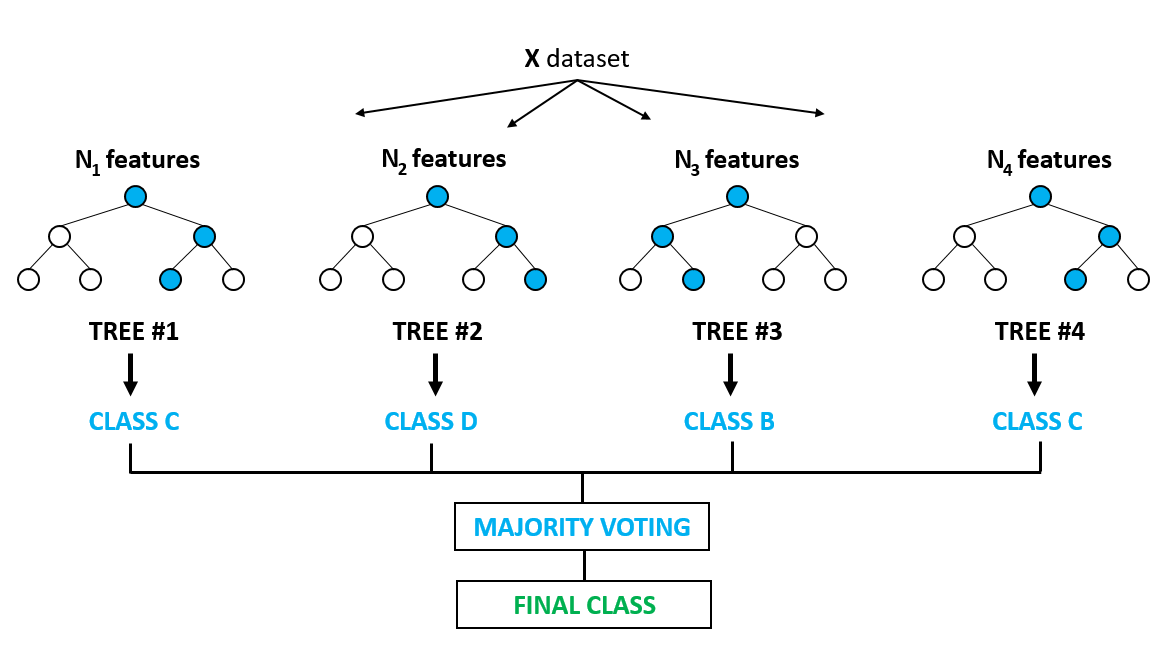

## Algorithm
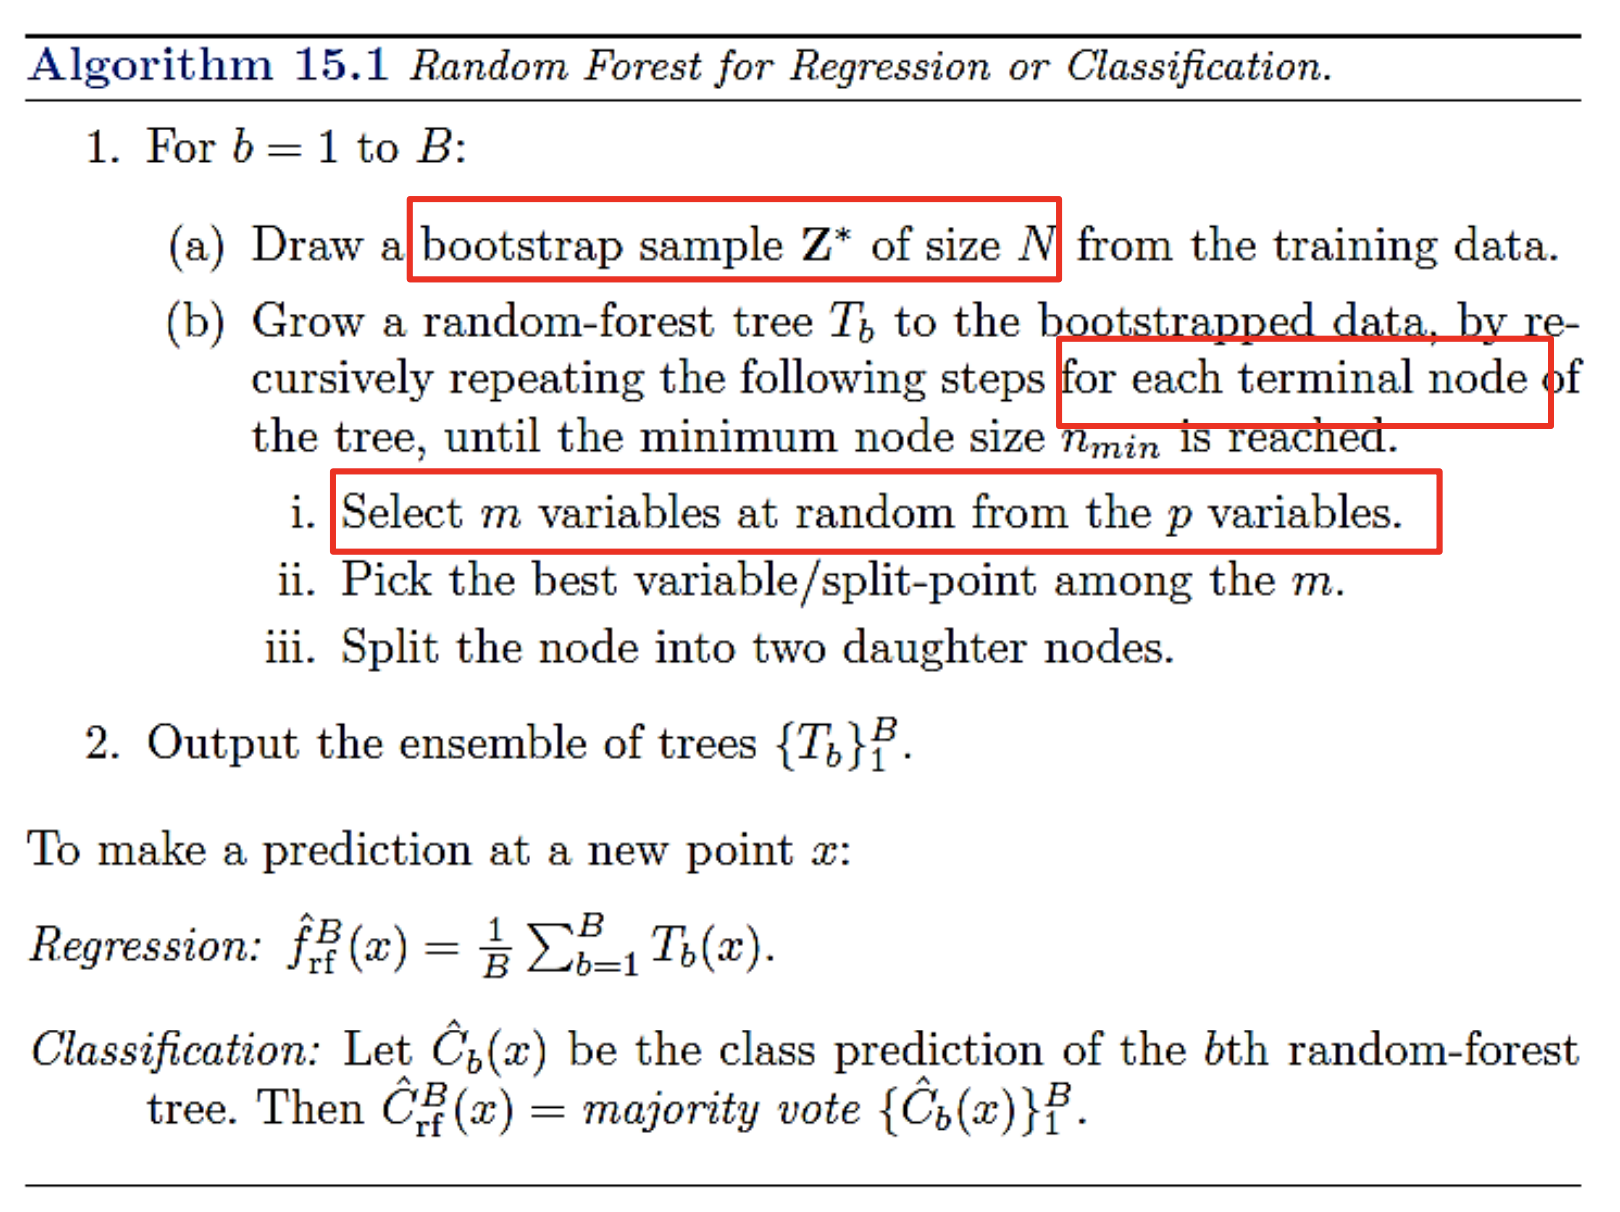

## Hypertuning
* n_estimators
* max_features
* min_samples_split
* min_samples_leaf

In [37]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]

# Create the random grid for feature sealection
random_grid = {'n_estimators'      : n_estimators,
               'max_features'      : max_features,
               'min_samples_split' : min_samples_split,
               'min_samples_leaf'  : min_samples_leaf}

pprint(random_grid)

{'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [15]:
rfSearch = RandomForestRegressor()
rfRandomSearch = RandomizedSearchCV(estimator = rfSearch, 
                               param_distributions = random_grid, 
                               n_iter = 300,
                               verbose=2, 
                               random_state=42, 
                               n_jobs = -1)

# Fit the random search model
#rfRandomSearch.fit(X_train, y_train)

rfSearchPipe = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('classifier', rfRandomSearch)
])
rfSearchPipe.fit(X_train, y_train)

Fitting 3 folds for each of 180 candidates, totalling 540 fits


/Users/wilsons/anaconda3/envs/pyjup/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/wilsons/anaconda3/envs/pyjup/lib/python3.6/site-packages/sklearn/model_selection/_search.py:266: UserWarning: The total space of parameters 180 is smaller than n_iter=300. Running 180 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    9.1s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   43.3s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed:  2.3min finished
/Users/wilsons/anaconda3/envs/pyjup/lib/python3.6/site-packages/sklearn/model_selection/_sear

Pipeline(memory=None,
         steps=[('preprocess',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('numeric',
                                                  Pipeline(memory=None,
                                                           steps=[('imputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value=None,
                                                                                 missing_values=nan,
                                                                                 strategy='median',
                                                           

## Best Parameters

In [16]:
rfRandomSearch.best_params_

{'n_estimators': 200,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt'}

## Model

In [17]:
rf = RandomForestRegressor(n_estimators  = rfRandomSearch.best_params_['n_estimators'], 
                           min_samples_split = rfRandomSearch.best_params_['min_samples_split'],
                           min_samples_leaf  = rfRandomSearch.best_params_['min_samples_leaf'],
                           max_features      = rfRandomSearch.best_params_['max_features'],
                           oob_score=True)

rfPipe = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('classifier', rf)
])
rfPipe.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('preprocess',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('numeric',
                                                  Pipeline(memory=None,
                                                           steps=[('imputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value=None,
                                                                                 missing_values=nan,
                                                                                 strategy='median',
                                                           

## Out of Bag

In [18]:
print('OOB   {:.3f}'.format(rf.oob_score_))

OOB   0.855


## Predictions

In [19]:
preds = rfPipe.predict(X_test)
print('Score Train {:.3f}'.format(rfPipe.score(X_train, y_train)))
print('Score Test  {:.3f}'.format(rfPipe.score(X_test, y_test)))

Score Train 0.979
Score Test  0.885


## Residuals Plot

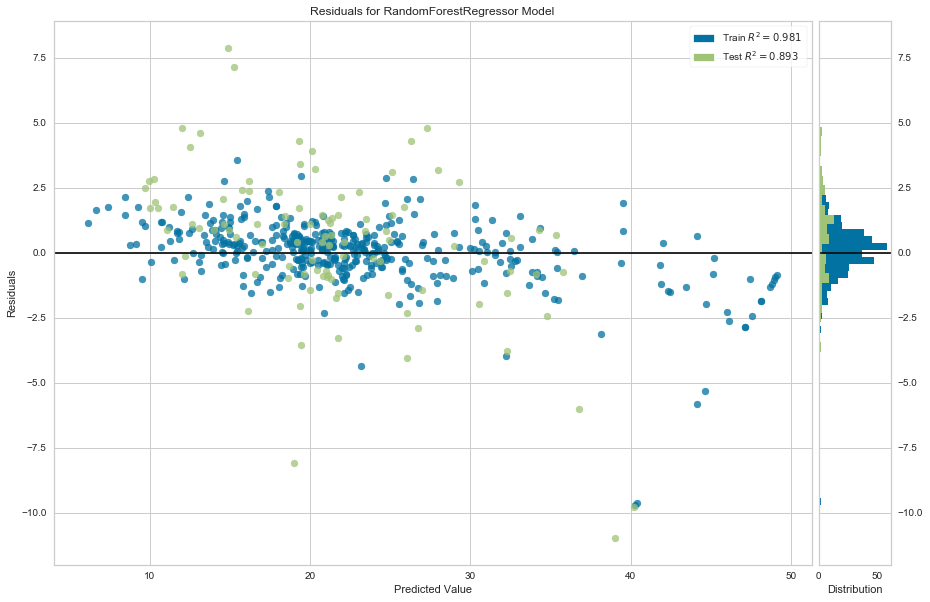

In [20]:
plt.figure(figsize=(15,10))
visualizer = ResidualsPlot(rfPipe)
visualizer.fit(X_train, y_train)  # Fit the training data to the model
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.poof() 

## Metrics

In [21]:
maeRF, mseRF, rmseRF, accuracyRF = metrics(y_test, preds)
resultsDF.loc['Random Forest'] = [maeRF, mseRF, rmseRF, accuracyRF]

MAE      : 2.122
MSE      : 8.778
RMSE     : 2.963
Accuracy : 86.66%


## Importance

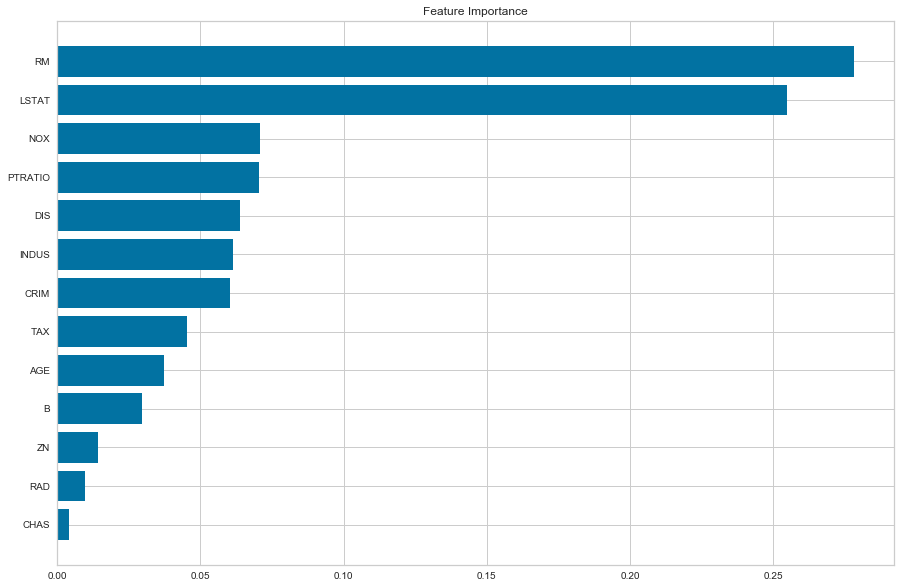

In [22]:
features = X_train.columns
importances = rf.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(15,10))
plt.title('Feature Importance')
plt.barh(range(len(indices)),   importances[indices], color='b')
plt.yticks(range(len(indices)), features[indices])
plt.show()

## View Decision Tree

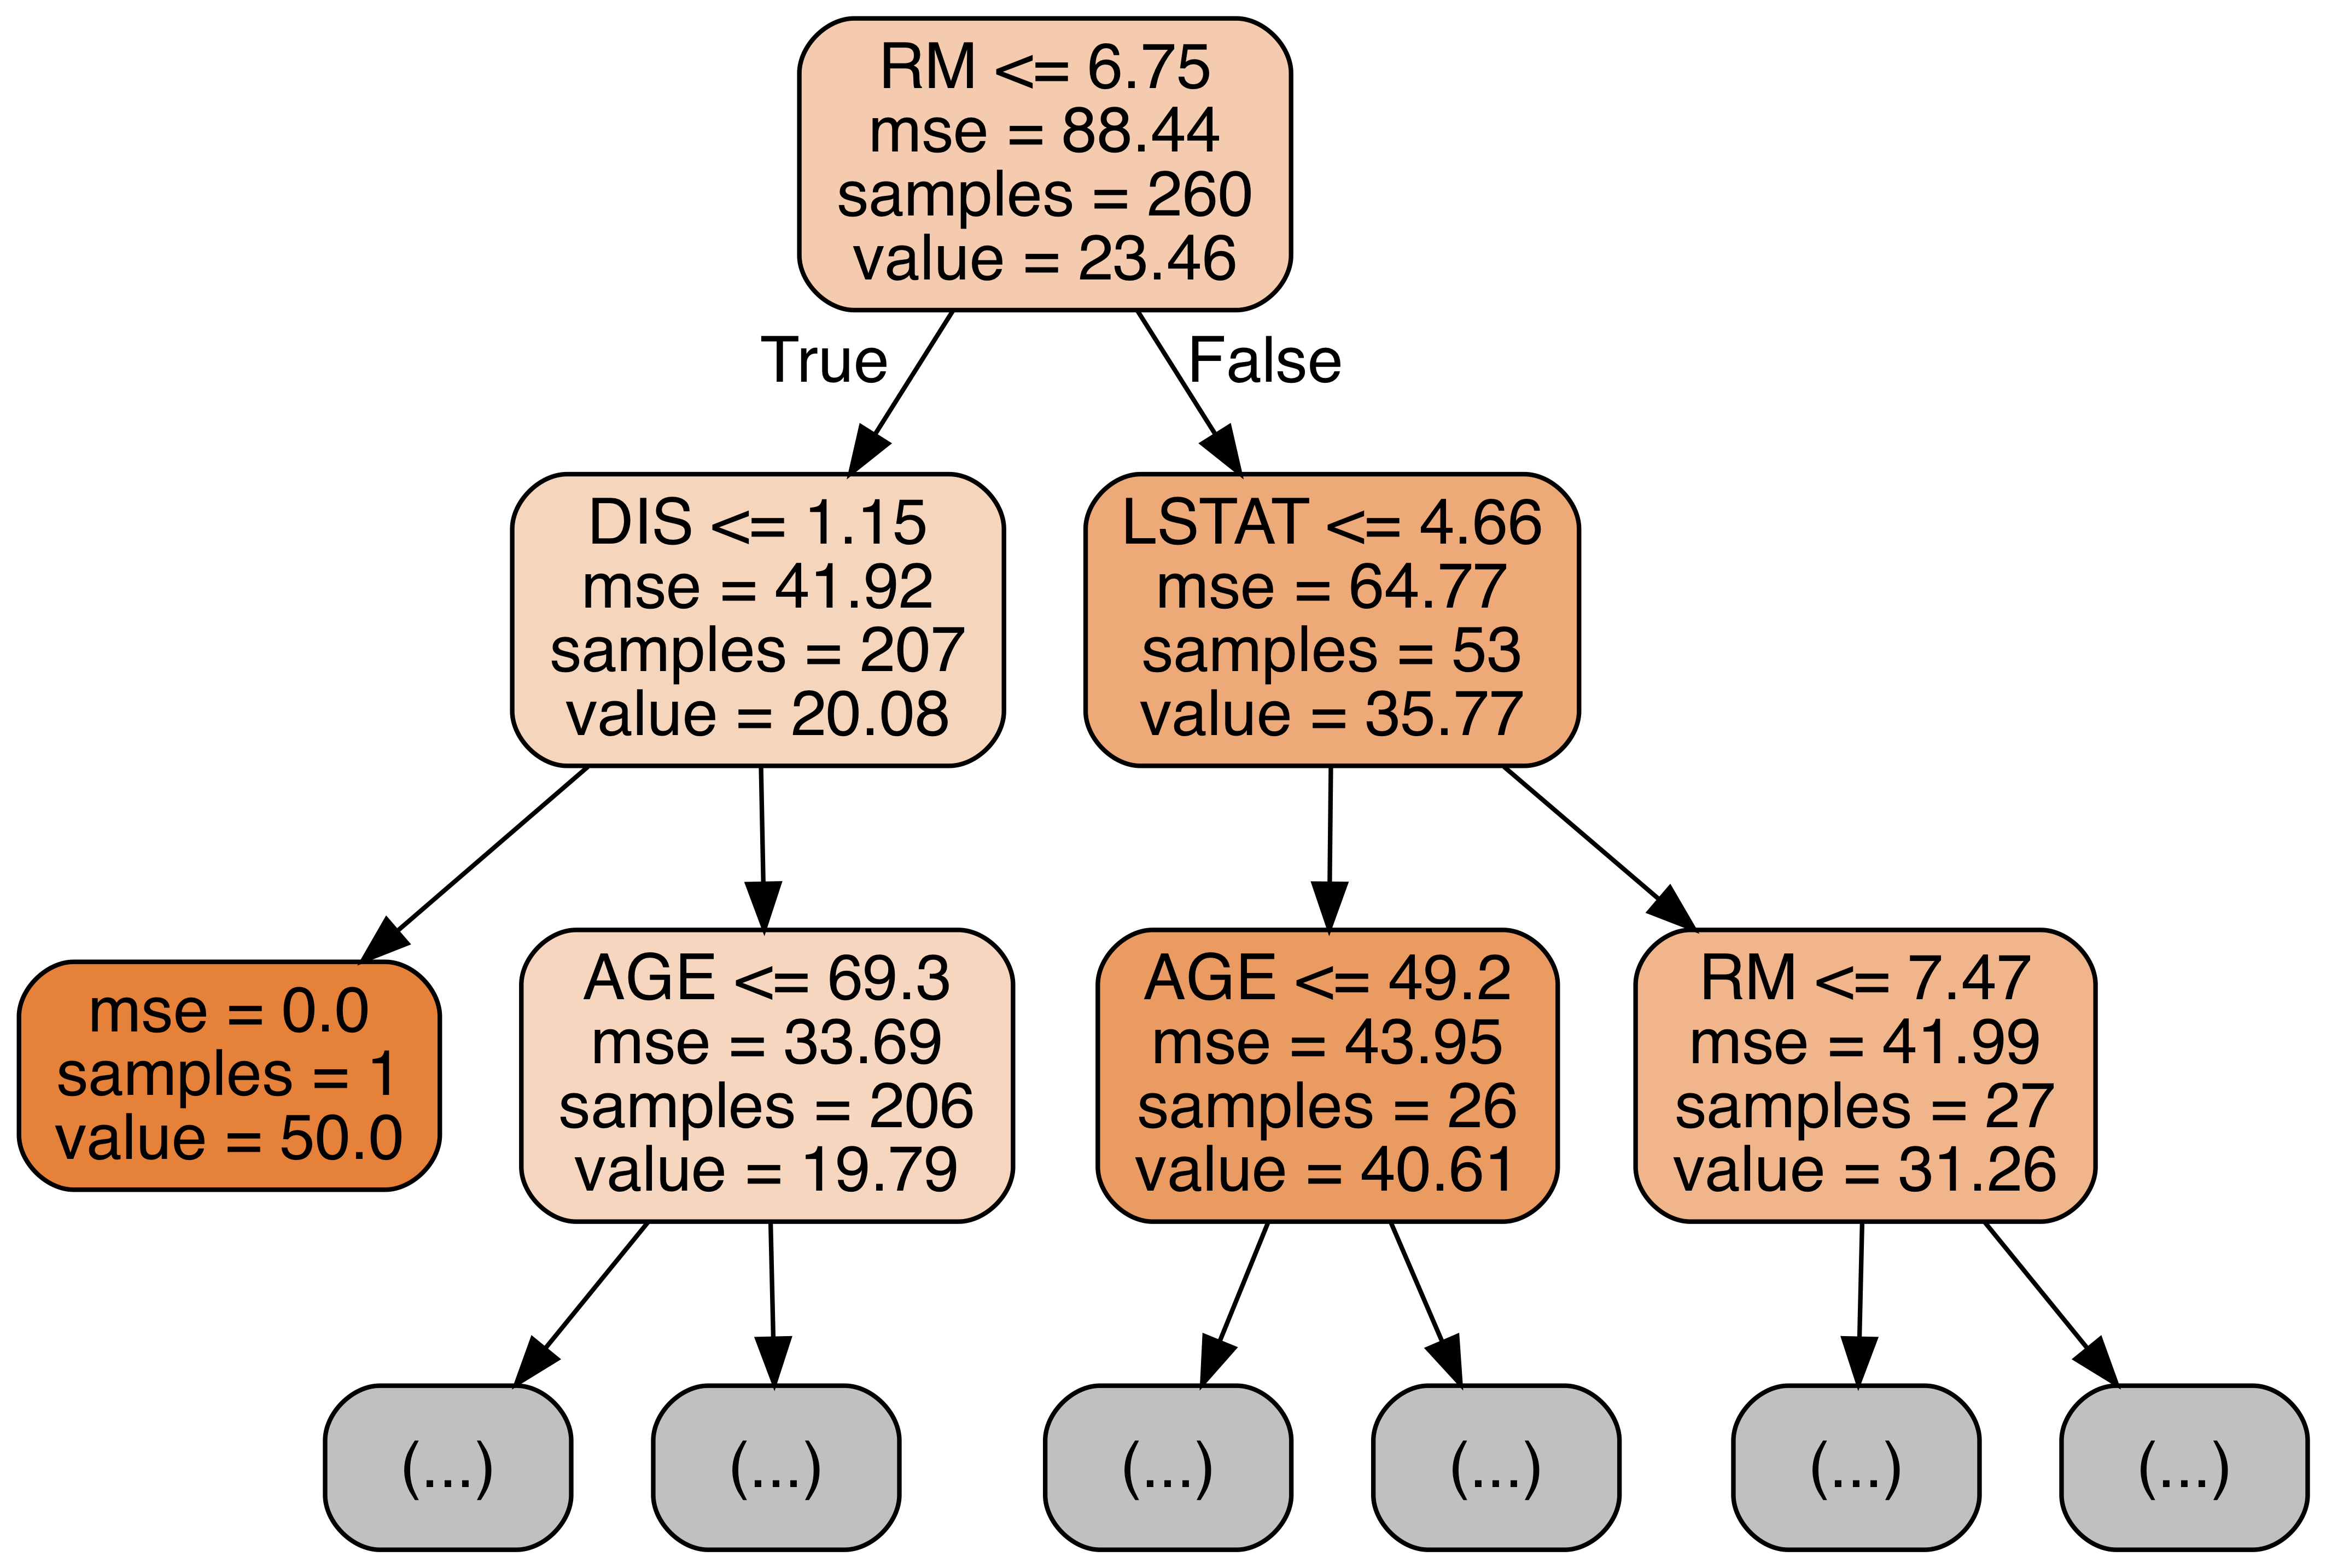

In [23]:
est = rf.estimators_[0]
export_graphviz(est, out_file='rftree.dot', 
                feature_names = X_train.columns,
                rounded = True, proportion = False, 
                precision = 2, filled = True, max_depth=2)
call(['dot', '-Tpng', 'rftree.dot', '-o', 'rftree.png', '-Gdpi=600'])
Image(filename = './rftree.png')

## Prediction Interval
https://blog.datadive.net/prediction-intervals-for-random-forests/

In [24]:
def interval(model, X, percentile=95):
    pi_down  = []
    pi_up    = []
    model_preds = []
    
    for est in model.estimators_:
        predictions = est.predict(X)
        model_preds.append(predictions)
        
    for pt in range(len(X)):
        predicted = []
        for mp in range(len(model_preds)):
            predicted.append(model_preds[mp][pt])
        pi_down.append(np.percentile(predicted, q=(100-percentile) / 2.))
        pi_up.append(np.percentile(predicted, q=100-(100-percentile) / 2.)) 
    return pi_down, pi_up

# Pull the preprocessing into an intervsal pipeline
intervalPipeline = Pipeline(steps=[
    ('preprocess', preprocessor)
])

# Generate the Intervals
intervalY = y_test.copy().reset_index(drop=True)
intervalX = X_test.copy().reset_index(drop=True)
intervalX = intervalPipeline.transform(intervalX)
intervalPred = rf.predict(intervalX)

percentile = 95
err_down, err_up = interval(rf, intervalX, percentile=percentile)
piDF = pd.DataFrame({'Predicted': intervalPred, 
                     'Lower': err_down, 
                     'Actual': intervalY, 
                     'Upper': err_up})
piDF['Correct'] = np.where((piDF.Lower <= piDF.Actual) & (piDF.Actual <= piDF.Upper), 1, 0)
print('Percent in {}th prediction interval: {:.3f}'.format(percentile, 
                                                           piDF.Correct.sum() / piDF.Correct.shape[0] * 100.0))

Percent in 95th prediction interval: 96.078


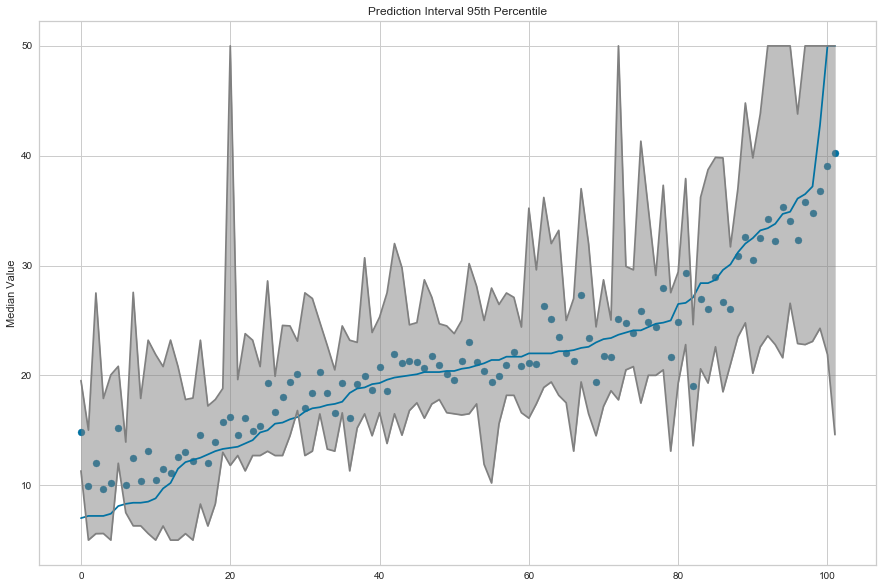

In [25]:
df = piDF.sort_values('Actual').reset_index()
plt.figure(figsize=(15,10))
plt.title('Prediction Interval {}th Percentile'.format(percentile))
plt.ylabel('Median Value')
plt.plot(df.Actual, label='Actual')
plt.plot(df.Lower, color='grey')
plt.plot(df.Upper, color='grey')
plt.scatter(df.index, df.Predicted)
plt.fill_between(df.index, df.Lower, df.Upper, color='grey', alpha=0.5)
plt.show()

## Contribution
* TreeInterpreter Library
* http://blog.datadive.net/random-forest-interpretation-with-scikit-learn/

In [311]:
prediction, bias, contributions = ti.predict(rf, X_test)
contribDF = pd.DataFrame({'Feature': X_test.columns, 
                          'Contribution': contributions[0],
                          'Value':X_test.iloc[0]})
contribDF = contribDF.sort_values('Contribution').set_index('Feature')

print('Baseline (Y-Mean) / Bias of RF : {:.2f}\n'.format(bias[0]))
print(contribDF)
print('\nSum of Contribution {:.2f}\n'.format(contribDF.Contribution.sum()))
print('Predicted Value of RF : {:.2f}'.format(*prediction[0]))
print('Predicted Value of RF : {:.2f} = Bias {:.2f} + Contribution {:.2f}'.format(
    *prediction[0], bias[0], contribDF.Contribution.sum()))

Baseline (Y-Mean) / Bias of RF : 22.89

         Contribution      Value
Feature                         
RM          -1.306868    6.12700
PTRATIO     -1.137970   20.90000
LSTAT       -0.872409   14.09000
INDUS       -0.764112    8.56000
AGE         -0.450689   85.20000
DIS         -0.168160    2.12240
ZN          -0.165382    0.00000
CHAS        -0.047777    0.00000
TAX          0.076392  384.00000
RAD          0.163124    5.00000
NOX          0.217761    0.52000
B            0.268095  387.69000
CRIM         0.877449    0.13117

Sum of Contribution -3.31

Predicted Value of RF : 19.58
Predicted Value of RF : 19.58 = Bias 22.89 + Contribution -3.31


6.213509803921569

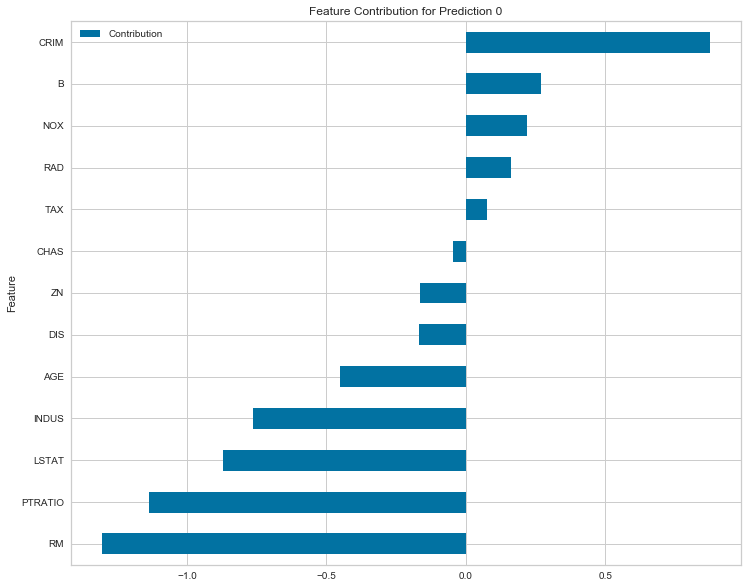

In [314]:
contribDF.plot.barh(y='Contribution', figsize=(12,10), color='C0')
plt.title('Feature Contribution for Prediction 0')

# ExtraTrees

## Algorithm
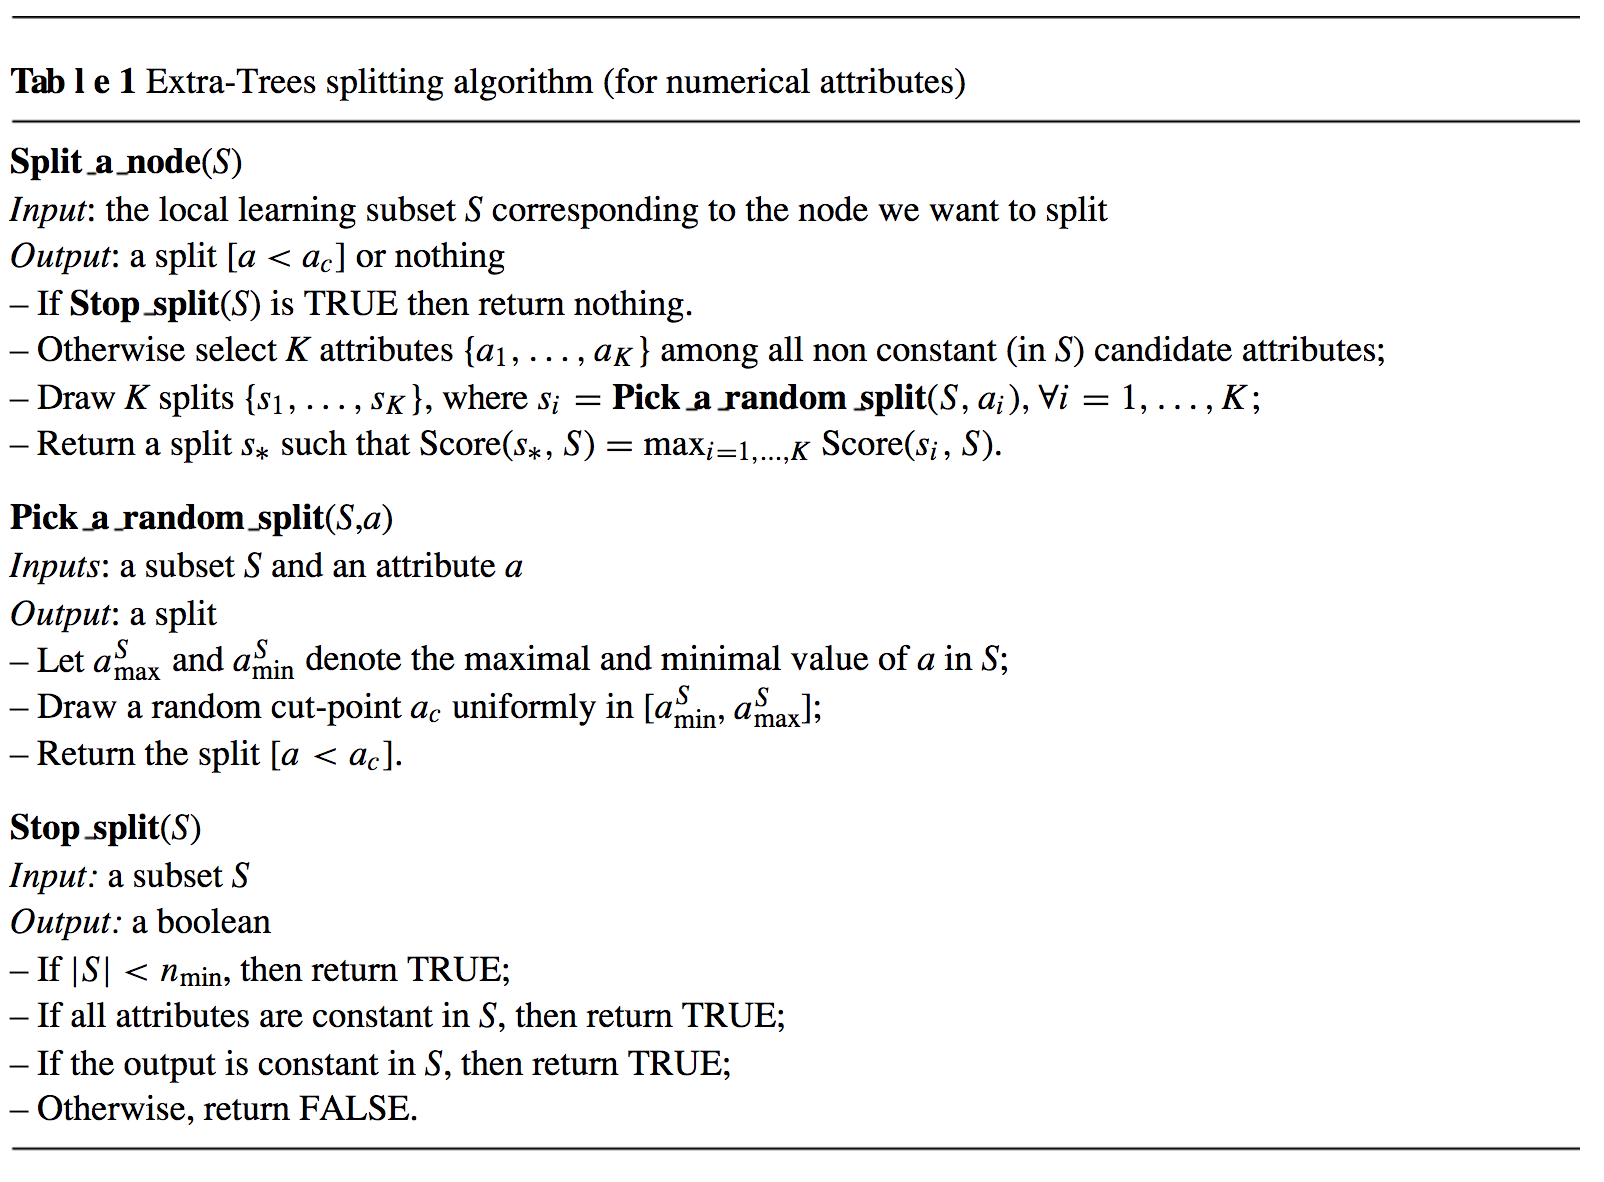

## Hypertuning

In [315]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]

# Create the random grid for feature sealection
random_grid = {'n_estimators'      : n_estimators,
               'max_features'      : max_features,
               'min_samples_split' : min_samples_split,
               'min_samples_leaf'  : min_samples_leaf}

pprint(random_grid)

{'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [27]:
etSearch = ExtraTreesRegressor()
etRandomSearch = RandomizedSearchCV(estimator = etSearch, 
                               param_distributions = random_grid, 
                               n_iter = 300,
                               verbose=2, 
                               random_state=42, 
                               n_jobs = -1)

etSearchPipe = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('classifier', etRandomSearch)
])
etSearchPipe.fit(X_train, y_train)

Fitting 3 folds for each of 180 candidates, totalling 540 fits


/Users/wilsons/anaconda3/envs/pyjup/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/wilsons/anaconda3/envs/pyjup/lib/python3.6/site-packages/sklearn/model_selection/_search.py:266: UserWarning: The total space of parameters 180 is smaller than n_iter=300. Running 180 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    6.0s
/Users/wilsons/anaconda3/envs/pyjup/lib/python3.6/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.",

Pipeline(memory=None,
         steps=[('preprocess',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('numeric',
                                                  Pipeline(memory=None,
                                                           steps=[('imputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value=None,
                                                                                 missing_values=nan,
                                                                                 strategy='median',
                                                           

## Best Parameters

In [28]:
etRandomSearch.best_params_

{'n_estimators': 200,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto'}

## Model

In [29]:
et = ExtraTreesRegressor(n_estimators  = etRandomSearch.best_params_['n_estimators'], 
                         min_samples_split = rfRandomSearch.best_params_['min_samples_split'],
                         min_samples_leaf  = rfRandomSearch.best_params_['min_samples_leaf'],
                         max_features      = rfRandomSearch.best_params_['max_features'])

etPipe = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('classifier', et)
])
etPipe.fit(X_train,  y_train)

Pipeline(memory=None,
         steps=[('preprocess',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('numeric',
                                                  Pipeline(memory=None,
                                                           steps=[('imputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value=None,
                                                                                 missing_values=nan,
                                                                                 strategy='median',
                                                           

## Predictions

In [30]:
preds = etPipe.predict(X_test)
print('Score Train {:.3f}'.format(etPipe.score(X_train, y_train)))
print('Score Test  {:.3f}'.format(etPipe.score(X_test, y_test)))

Score Train 1.000
Score Test  0.903


## Metrics

In [31]:
maeET, mseET, rmseET, accuracyET = metrics(y_test, preds)
resultsDF.loc['Extra Trees'] = [maeET, mseET, rmseET, accuracyET]

MAE      : 2.002
MSE      : 7.385
RMSE     : 2.718
Accuracy : 87.31%


# Regularized Greedy Forests
* https://github.com/RGF-team/rgf/tree/master/python-package
* https://arxiv.org/abs/1109.0887


## Hypertuning

In [64]:
algorithm = ['RGF', 'RGF_Opt', 'RGF_Sib']
max_leaf = [250, 500, 750, 1000, 1500, 2000]
l2 = [0.01, 0.1, 1.0]
learning_rate = [0.1, 0.25, 0.5, 0.75, 1.0]

# Create the random grid for feature sealection
random_grid = {'algorithm'     : algorithm,
               'max_leaf'      : max_leaf,
               'l2'            : l2,
               'learning_rate' : learning_rate}

pprint(random_grid)

{'algorithm': ['RGF', 'RGF_Opt', 'RGF_Sib'],
 'l2': [0.01, 0.1, 1.0],
 'learning_rate': [0.1, 0.25, 0.5, 0.75, 1.0],
 'max_leaf': [250, 500, 750, 1000, 1500, 2000]}


In [65]:
rgfSearch = RGFRegressor(test_interval=100, loss="LS", verbose=False)
rgfRandomSearch = RandomizedSearchCV(estimator = rgfSearch, 
                               param_distributions = random_grid, 
                               n_iter = 300,
                               verbose=2, 
                               random_state=42, 
                               n_jobs = -1)

rgfPipe = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('classifier', rgfRandomSearch)
])
rgfPipe.fit(X_train,  y_train)

Fitting 3 folds for each of 270 candidates, totalling 810 fits


/Users/wilsons/anaconda3/envs/pyjup/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/wilsons/anaconda3/envs/pyjup/lib/python3.6/site-packages/sklearn/model_selection/_search.py:266: UserWarning: The total space of parameters 270 is smaller than n_iter=300. Running 270 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    7.7s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   16.1s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:   30.8s
[Parallel(n_jobs=-1)]: Done 810 out of 810 | elapsed:   40.0s finished
/Users/wilsons/anaconda3/envs/p

Pipeline(memory=None,
         steps=[('preprocess',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('numeric',
                                                  Pipeline(memory=None,
                                                           steps=[('imputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value=None,
                                                                                 missing_values=nan,
                                                                                 strategy='median',
                                                           

## Best Parameters

In [66]:
rgfRandomSearch.best_params_

{'max_leaf': 1500, 'learning_rate': 0.75, 'l2': 0.1, 'algorithm': 'RGF'}

## Model

In [67]:
rgf = RGFRegressor(test_interval=100, 
                   loss="LS", 
                   verbose=False,
                   max_leaf      = rgfRandomSearch.best_params_['max_leaf'],
                   learning_rate = rgfRandomSearch.best_params_['learning_rate'],
                   algorithm     = rgfRandomSearch.best_params_['algorithm'],
                   l2            = rgfRandomSearch.best_params_['l2'])

rgfPipe = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('classifier', rgf)
])
rgfPipe.fit(X_train,  y_train)

Pipeline(memory=None,
         steps=[('preprocess',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('numeric',
                                                  Pipeline(memory=None,
                                                           steps=[('imputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value=None,
                                                                                 missing_values=nan,
                                                                                 strategy='median',
                                                           

## Predictions

In [68]:
y_pred = rgfPipe.fit(X_train, y_train).predict(X_test)

## Metrics

In [69]:
maeRGF, mseRGF, rmseRGF, accuracyRGF = metrics(y_test, y_pred)
resultsDF.loc['Regularized Greedy Forest'] = [maeRGF, mseRGF, rmseRGF, accuracyRGF]

MAE      : 1.917
MSE      : 6.434
RMSE     : 2.537
Accuracy : 88.22%


## Residuals Plot

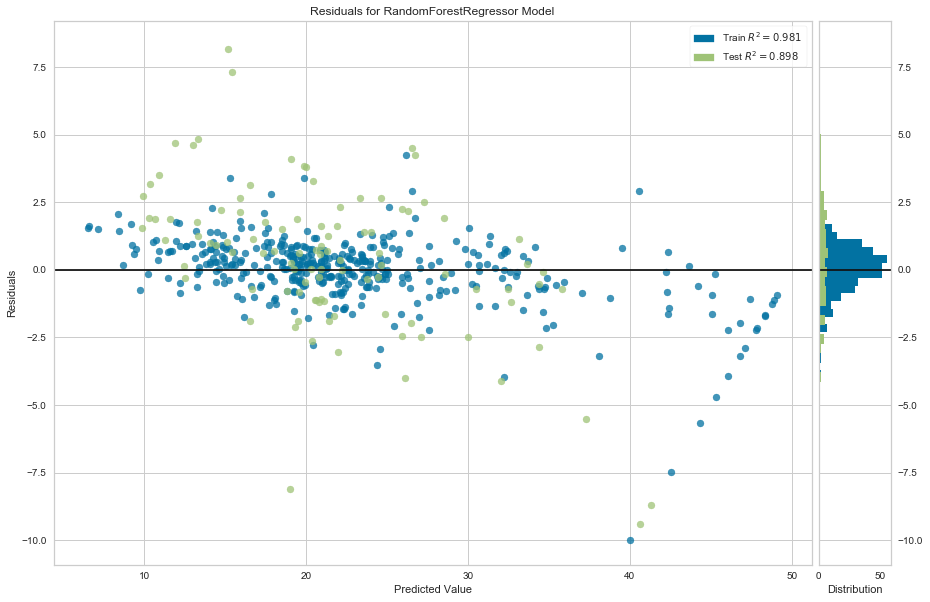

In [73]:
plt.figure(figsize=(15,10))
visualizer = ResidualsPlot(rfPipe)
visualizer.fit(X_train, y_train)  # Fit the training data to the model
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.poof() 

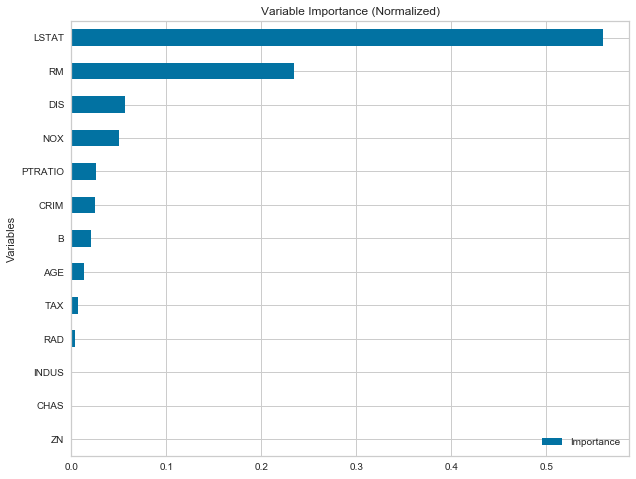

In [166]:
impDF = pd.DataFrame({'Variables': X_train.columns, 'Importance': rgf.feature_importances_})
impDF.set_index('Variables').sort_values('Importance', ascending=True).plot.barh(figsize=(10,8))
plt.title('Variable Importance (Normalized)')
plt.legend(loc='lower right')

# Results

## Best MAE

In [242]:
resultsDF.sort_values('MAE')

MAE        MSE      RMSE   Accuracy
Regularized Greedy Forest  1.917145   6.434387  2.536609  88.221717
Extra Trees                2.001620   7.385366  2.717603  87.306021
Random Forest              2.122034   8.777735  2.962724  86.661221
Regularized Decision Tree  2.887829  16.170138  4.021211  84.024951
Decision Tree              3.160784  20.169608  4.491059  80.854620

## Best RMSE

In [243]:
resultsDF.sort_values('RMSE')

MAE        MSE      RMSE   Accuracy
Regularized Greedy Forest  1.917145   6.434387  2.536609  88.221717
Extra Trees                2.001620   7.385366  2.717603  87.306021
Random Forest              2.122034   8.777735  2.962724  86.661221
Regularized Decision Tree  2.887829  16.170138  4.021211  84.024951
Decision Tree              3.160784  20.169608  4.491059  80.854620

# Practical Advice & Tips
* https://www.thekerneltrip.com/statistics/random-forest-vs-extra-tree/


* Decision Trees
 * Highly model interpetable 
 * Little data prep needed but need to balance classes
 * High variance learning (Pruning not supported in sklearn -- need to use max_depth & min_samples_leaf)
 * sklearn uses optimized CART but you have to one-hot encode catagorical variables
* Random Forests
 * Work by reducing variance of individual trees.
 * Experience decreasing accuracy when the number of unrelated features is increased
 * Boosting is usually always slightly better than Random Forest (Switch to XGBoost, LightGBM or CatBoost)
 * Can train trees in parallel
* Regularized Greedy Forests > Extra Trees > Random Forests
 * Extra Trees are roughly 2-3X faster at training
 * Extra Trees is more robust to unrelated features compared to Random Forest
 * RGF and fastRGF can outperform both RF and ET (on par with Gradient Boosting)
* Parameter Tuning
 * Keep max_depth=None and set min_samples_leaf instead. 
 * Controlling the depth of a tree can only increase the performance marginally and it’s not worth having to grid-search over an extra parameter.
 * Keep the number of trees, n_estimators high. RFs don’t overfit when this parameter is increased.
 * Optimising over max_features should be beneficial.
* Cross-validation isn’t necessary as bootstrapping allows one to use out-of-bag errors instead enabling cross-validation and fitting in one go. 
 * CV errors are very close to OOB errors, so use oob_score=True.
* Don’t bother with proximity plots for classification trees.
